In [1]:
%matplotlib inline

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
def read_algo(name):
    df = pd.read_csv(f'{name}.csv')
    runs = [x for x in df.columns if x.startswith('run')]
    df['average'] = df[runs].mean(axis=1)
    return df[['generation', 'effort', 'average']]

names = ['rsel', 'cel-rs', '2cel-rs', 'cel', '2cel']
frames = twocel_rs, twocel, cel_rs, cel, rsel = [read_algo(x) for x in names]

In [72]:
twocel.head()

,generation,effort,average
0,0,2500,0.647347
1,1,5000,0.658466
2,2,7500,0.663041
3,3,10000,0.666131
4,4,12500,0.690259


ValueError: too many values to unpack (expected 1)

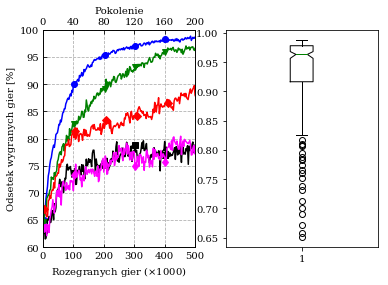

In [133]:
from matplotlib import cycler

labels = ['1-Evol-RS', '1-Coev-RS', '2-Coev-RS', '1-Coev', '2-Coev']
colors = ['blue', 'green', 'red', 'black', 'magenta']
markers = ['o', 'v', 'D', 's', 'd']

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams['axes.prop_cycle'] = cycler(color=colors)

fig, axes = plt.subplots(nrows=1, ncols=2)

ax1 = axes[0]
ax1.set_xlabel(r'Rozegranych gier ($\times 1000$)')
ax1.set_xticklabels(np.arange(0, 500+1, 100))
ax1.set_ylabel('Odsetek wygranych gier [%]')
ax1.set_yticklabels(np.arange(60, 100+1, 5))

for i, df in enumerate(frames):
    ax1.plot(df.effort, df.average, label=labels[i], marker=markers[i],
            markevery=40)

ax1.set_xlim(0, 500_000)
ax1.set_ylim(0.6, 1.0)
ax1.tick_params(direction='in')
ax1.grid(linestyle='--')

ax2 = ax1.twiny()
ax2.set_xlabel('Pokolenie')
ax2.set_xticklabels(np.arange(0, 200+1, 40))
ax2.tick_params(direction='in')

ax3 = axes[1]
for i, df in enumerate(frames):
    line, = ax3.boxplot(df.average, notch=True, bootstrap=10_000)
    plt.legend(handler_map={line: HandlerLine2D(numpoints=2)})
ax3.yaxis.tick_right()
ax3.set_ylim(0.6, 1)
ax3.set_yticklabels(np.arange(60, 100+1, 5))
ax3.tick_params(direction='in')
ax3.grid(linestyle='--')

plt.show()